In [ ]:
# Минипроект 7

In [1]:
import pandas as pd
import requests
import json

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# step_1_lesson_7
df1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/tasks/data_for_7_lesson/step_1_lesson_7.csv')
df1

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


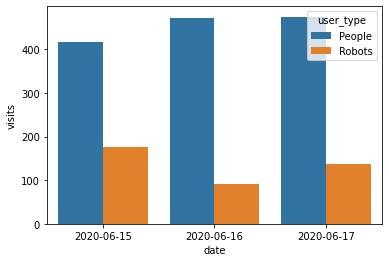

In [15]:
#  Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика.

sns.barplot(x=df1.date, y=df1.visits, hue = df1.user_type)

In [16]:
# step_2_lesson_7

df2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/tasks/data_for_7_lesson/step_2_lesson_7.csv')
df2

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [17]:
#  Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome

round((df2.query("browser=='Google Chrome'").visits.sum()/df2.visits.sum()*100), 0)

60.0

In [33]:
# step_3_lesson_7
#  у какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере

df3 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/tasks/data_for_7_lesson/step_3_lesson_7.csv')
df3.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [34]:
#  считаем суммарные посещения ботами по браузерам

rob_visits = df3.query("user_type=='Robots'").groupby(['browser'], as_index=False).agg({'visits':'sum'})
rob_visits

,browser,visits
0,Chromium,1.0
1,Edge,1.0
2,Firefox,31.0
3,Google Chrome,104.0
4,Mobile Safari,1.0
5,Opera,5.0
6,Safari,22.0
7,Samsung Internet,1.0
8,UCWEB,4.0
9,Yandex Browser,7.0


In [35]:
#  Общее число посещений по браузерам

sum_visits = df3.groupby(['browser'], as_index=False).agg({'visits':'sum'})
sum_visits

,browser,visits
0,Android Browser,1.0
1,Chrome Mobile,31.0
2,Chromium,2.0
3,CocCoc,1.0
4,Edge,5.0
5,Firefox,58.0
6,Google Chrome,354.0
7,Mobile Safari,16.0
8,Opera,16.0
9,Safari,41.0


In [36]:
#   соединяем таблицы посещений

df3_merge = sum_visits.merge(rob_visits, on='browser', how='inner')
df3_merge

,browser,visits_x,visits_y
0,Chromium,2.0,1.0
1,Edge,5.0,1.0
2,Firefox,58.0,31.0
3,Google Chrome,354.0,104.0
4,Mobile Safari,16.0,1.0
5,Opera,16.0,5.0
6,Safari,41.0,22.0
7,Samsung Internet,9.0,1.0
8,UCWEB,4.0,4.0
9,Yandex Browser,54.0,7.0


In [37]:
#  считаем долю посещений ботами

df3_merge['perc_rob'] =df3_merge.visits_y / df3_merge.visits_x
df3_merge

,browser,visits_x,visits_y,perc_rob
0,Chromium,2.0,1.0,0.500000
1,Edge,5.0,1.0,0.200000
2,Firefox,58.0,31.0,0.534483
3,Google Chrome,354.0,104.0,0.293785
4,Mobile Safari,16.0,1.0,0.062500
5,Opera,16.0,5.0,0.312500
6,Safari,41.0,22.0,0.536585
7,Samsung Internet,9.0,1.0,0.111111
8,UCWEB,4.0,4.0,1.000000
9,Yandex Browser,54.0,7.0,0.129630


In [38]:
#  сортируем в порядке убывания по доле от общего числа посещений

df3_merge.sort_values(by='perc_rob', ascending=False)

,browser,visits_x,visits_y,perc_rob
8,UCWEB,4.0,4.0,1.000000
6,Safari,41.0,22.0,0.536585
2,Firefox,58.0,31.0,0.534483
0,Chromium,2.0,1.0,0.500000
5,Opera,16.0,5.0,0.312500
3,Google Chrome,354.0,104.0,0.293785
1,Edge,5.0,1.0,0.200000
9,Yandex Browser,54.0,7.0,0.129630
7,Samsung Internet,9.0,1.0,0.111111
4,Mobile Safari,16.0,1.0,0.062500


In [2]:
# step_4_lesson_7

df4 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/tasks/data_for_7_lesson/step_4_lesson_7.csv')
df4.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [3]:
df4.visits.sum()

594.0

In [4]:
#   найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день

df4.groupby(['browser', 'user_type'], as_index=False).agg({'visits':'sum'}).head()

,browser,user_type,visits
0,Android Browser,People,1.0
1,Chrome Mobile,People,31.0
2,Chromium,People,1.0
3,Chromium,Robots,1.0
4,CocCoc,People,1.0


In [5]:
df4['percent'] = round((df4['visits']/ df4.visits.sum()*100), 1)
df4.head()

,date,browser,user_type,visits,percent
0,2020-06-15,Google Chrome,People,250.0,42.1
1,2020-06-15,Google Chrome,Robots,104.0,17.5
2,2020-06-15,Yandex Browser,People,47.0,7.9
3,2020-06-15,Firefox,Robots,31.0,5.2
4,2020-06-15,Chrome Mobile,People,31.0,5.2


In [26]:
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

my_mail = 'darina.geo88@gmail.com'
path_to_credentials = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/python_lessons/my-project-darina-5fc288213a02.json'

# Authorization
credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credentials, scope)
gs = gspread.authorize(credentials)

In [27]:
# Загрузка таблицы из гугл доков


table_name = 'test_spreadsheet'             # my table
# Name of the table in google sheets: can be url for open_by_url, or id (key) part for open_by_key

work_sheet = gs.open(table_name)            # Get this table


sheet2 = work_sheet.sheet1                  # Select 1st sheet
data = sheet2.get_all_values()              # Get data in python lists format
data

[['Категория', 'авторы', 'всего публикаций (2007-2016)'],
 ['GEOSCIENCES, MULTIDISCIPLINARY', 'MARUYAMA S', '1955'],
 ['MINING & MINERAL PROCESSING', 'ZHANG QQ', '1480'],
 ['MINERALOGY', 'Siddique, Rafat', '936'],
 ['MINING & MINERAL PROCESSING', 'ROBINSON L', '886'],
 ['GEOLOGY', 'SANTOSH M', '711'],
 ['CRYSTALLOGRAPHY', 'TIEKINK ERT', '687'],
 ['GEOSCIENCES, MULTIDISCIPLINARY', 'OLSEN A', '620']]

In [28]:
# Get header from data

headers = data.pop(0)
headers

['Категория', 'авторы', 'всего публикаций (2007-2016)']

In [31]:
# Create df

df_authors = pd.DataFrame(data, columns=headers)
df_authors.head()

,Категория,авторы,всего публикаций (2007-2016)
0,"GEOSCIENCES, MULTIDISCIPLINARY",MARUYAMA S,1955
1,MINING & MINERAL PROCESSING,ZHANG QQ,1480
2,MINERALOGY,"Siddique, Rafat",936
3,MINING & MINERAL PROCESSING,ROBINSON L,886
4,GEOLOGY,SANTOSH M,711


In [20]:
#    Создание своей таблицы гугл док

table_name = 'table_4'
sheet = gs.create(table_name)                                 # Create empty table

sheet.share(my_mail, perm_type='user', role='writer')         # Make it visible to other guys

In [21]:
#      Экспорт датафрэйма в гугл доки

df = df4

sheet_name = 'Master'     # даем название листа, куда будет добавлен датафрейм

d2g.upload(df, table_name, sheet_name, credentials=credentials, row_names=True)      # загружаем

<Worksheet 'Master' id:1811020049>

In [32]:
#  загрузим авторов в таблицу 4 на новый лист authors

df = df_authors
table_name = 'table_4'
sheet_name = 'authors'    # даем название листа, куда будет добавлен датафрейм

d2g.upload(df, table_name, sheet_name, credentials=credentials, row_names=True)      # загружаем

<Worksheet 'authors' id:997879266>

In [41]:
#  загрузим df3_merge в таблицу 4 на новый лист sheet2

df = df3_merge
table_name = 'table_4'
sheet_name = 'sheet2'     # даем название листа, куда будет добавлен датафрейм

d2g.upload(df, table_name, sheet_name, credentials=credentials, row_names=True)      

<Worksheet 'sheet2' id:92898318>

In [22]:
# получение ссылки на гугл документ

spreadsheet_url = "https://docs.google.com/spreadsheets/d/%s" % sheet.id
spreadsheet_url

'https://docs.google.com/spreadsheets/d/1ppTTUT5VQKRgp1LY-_n0qI8g2KPgDwPjefo2Z8ubscw'

In [23]:
#   отправим ссылку в телеграм бот

import requests
import json
from urllib.parse import urlencode


token = '6895340302:AAGDx6NQTtdHmRi67tDYr3zGONg2SaKx-7E'
chat_id = 491276802                      # your chat id

message = spreadsheet_url                # text which you want to send

params = {'chat_id': chat_id, 'text': message}

base_url = f'https://api.telegram.org/bot{token}/'
url = base_url + 'sendMessage?' + urlencode(params)
# Only if you need it
# proxy = {'https': 'https://77.48.23.199:57842'}

# To send request via proxy
# resp = requests.get(url, proxies=proxy)
resp = requests.get(url)

In [ ]:
# step_5_lesson_7

In [ ]:
#  При помощи библиотеки gspread отправьте данные из предыдущего шага в Google SpreadSheet. 
#   Далее отправьте ссылку на получившийся файл в Google SpreadSheet 
#   (не забудьте открыть доступ по ссылке, это можно сделать вручную, когда данные уже зальются в таблицу) 
#   при помощи VK API себе в личку ВКонтакте.

In [ ]:
import gspread
import vk_api

In [ ]:
service_account_file = '/oauth/com-telesales-base-upload-6fff8fb7dc36.json'

In [ ]:
gc = gspread.service_account(filename=service_account_file)

In [ ]:
sh = gc.create('project_7_4_data')

In [ ]:
sh.share(email, perm_type='user', role='writer')

In [ ]:
worksheet = sh.get_worksheet(0)

In [ ]:
worksheet.update([data.columns.values.tolist()] + data.values.tolist())

In [ ]:
link = sh.url

In [ ]:
with open('vk_key') as f:
    token = f.read().strip()

vk_session = vk_api.VkApi(token=token)
vk = vk_session.get_api()

In [ ]:
vk.messages.send(cha_id=1,
                 random_id=np.random.randint(1, 2 ** 31), 
                 message=link)

In [ ]:
# step_6_lesson_7

In [ ]:
#  6. Другой аналитик уже агрегировал часть данных из метрики. 
#  Вам нужно объединить усилия, чтобы получить финальный отчет. 
#  Прочитайте дополнительные данные из Google SpreadSheet, 
#  объедините вашу таблицу из предыдущего шага с таблицей аналитика 
#  и посчитайте количество визитов на человека в разрезе по браузеру и значениям Robots/People.

In [27]:
from io import BytesIO
import requests


In [29]:
#  Вот так можно прочитать данные другого аналитика

url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv'
r = requests.get(url)
data = r.content
df = pd.read_csv(BytesIO(data))
df.head()

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0


In [30]:
#  объедините вашу таблицу из предыдущего шага с таблицей аналитика 

merged_data = df4.merge(df, on=['date', 'browser', 'user_type'])
merged_data .head()

,date,browser,user_type,visits,percent,users
0,2020-06-15,Google Chrome,People,250.0,42.1,240.0
1,2020-06-15,Google Chrome,Robots,104.0,17.5,104.0
2,2020-06-15,Yandex Browser,People,47.0,7.9,44.0
3,2020-06-15,Firefox,Robots,31.0,5.2,29.0
4,2020-06-15,Chrome Mobile,People,31.0,5.2,30.0


In [32]:
# посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People.

merged_data['visits_per_user'] = merged_data['visits'] / merged_data['users']
merged_data.head()

,date,browser,user_type,visits,percent,users,visits_per_user
0,2020-06-15,Google Chrome,People,250.0,42.1,240.0,1.041667
1,2020-06-15,Google Chrome,Robots,104.0,17.5,104.0,1.000000
2,2020-06-15,Yandex Browser,People,47.0,7.9,44.0,1.068182
3,2020-06-15,Firefox,Robots,31.0,5.2,29.0,1.068966
4,2020-06-15,Chrome Mobile,People,31.0,5.2,30.0,1.033333


In [34]:
merged_data.loc[(merged_data.browser == 'Google Chrome') & (merged_data.user_type == 'Robots')].visits_per_user

1    1.0
Name: visits_per_user, dtype: float64